Created: 2020.07.22

Modified: 2020.07.26

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

import random
import pandas as pd
from pathlib import Path

import sys
sys.path.append('../functions')
import functions32 as f32

# 2D AXIAL

In [3]:
folder_path = Path('/data-10tb/shared/skull/axial-2d/')

df_full = pd.read_csv(folder_path/'bias_mask-test-val-axial-2d.csv')
print(df_full.shape)
#df_full.head()

(425766, 6)


#### Select part of the whole df

In [4]:
df = f32.split_data(df_full, pct_rand_both=0.003, nr_beg_both=None)
df.shape

Original df=425766:	train=983, val=294,	train+val=1277, df*pct_rand_both=1277.3


(1277, 6)

#### Create a DataBunch

#### Image List

In [54]:
# item list
il = SegmentationItemList.from_df(df, folder_path, cols='bias_path', convert_mode='L')
#il

In [52]:
#il.items[0]

In [8]:
defaults.cmap = 'gray'

In [136]:
# przeskalowany??? (augumenatation)
#il[0].show()

In [137]:
# oryginal???
#print(il[0].shape)
#il[0]

In [138]:
# split data
sd = il.split_from_df(col='usage')
#sd

In [41]:
# label list
codes = np.loadtxt(folder_path/'codes.txt', dtype=str)
#codes

In [40]:
ll = sd.label_from_df(cols='mask_full_path', classes=codes)
#ll

In [235]:
# transformed labeled list, 
# [] - not transform for a validation set
#tmfs = ([*rand_pad(padding=3, size=128, mode='zeros')], [])
#tmfs1 = get_transforms(do_flip=True, flip_vert=False, max_rotate=15)

tmfs2 = get_transforms(do_flip=True, flip_vert=False,
                      max_rotate=25, max_zoom=1.05,
                      max_lighting=0.2, max_warp=None,
                      p_affine=0.5, p_lighting=0.5
                      )
ll = ll.transform(tmfs2, tfm_y=True, size=256, padding_mode='zeros', resize_method=ResizeMethod.PAD)

In [236]:
bs=128
data = ll.databunch(bs=bs).normalize(imagenet_stats);

In [237]:
#x,y = data.train_ds[0]
#print(x.shape, y.shape)

In [238]:
#x.show()
#y.show()
#x
#y

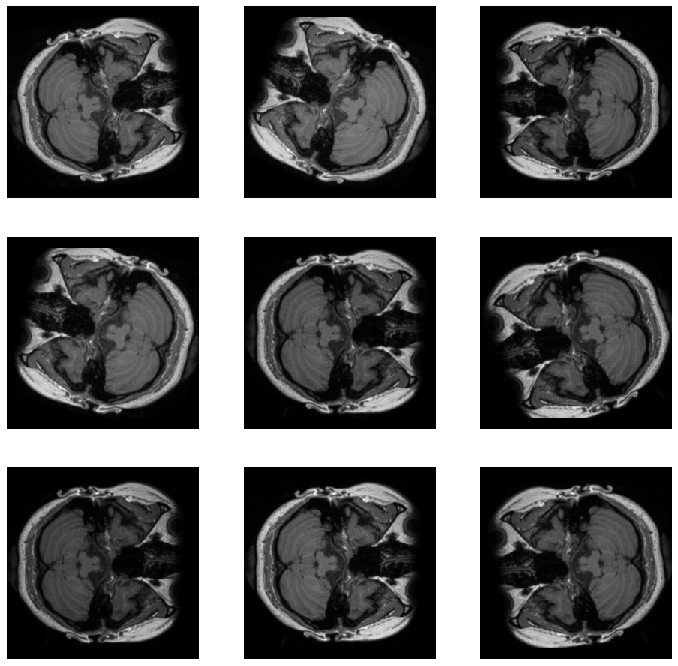

In [239]:
# load image[0][0] from a disc, and transform it on the fly!!! (the same image!!!)
def _plot(i,j,ax):data.train_ds[0][0].show(ax, cmap='gray')
plot_multi(_plot, 3,3, figsize=(12,12))

### get one batch

In [240]:
xb, yb = data.one_batch()

In [241]:
print(xb.shape, yb.shape)

torch.Size([128, 3, 256, 256]) torch.Size([128, 1, 256, 256])


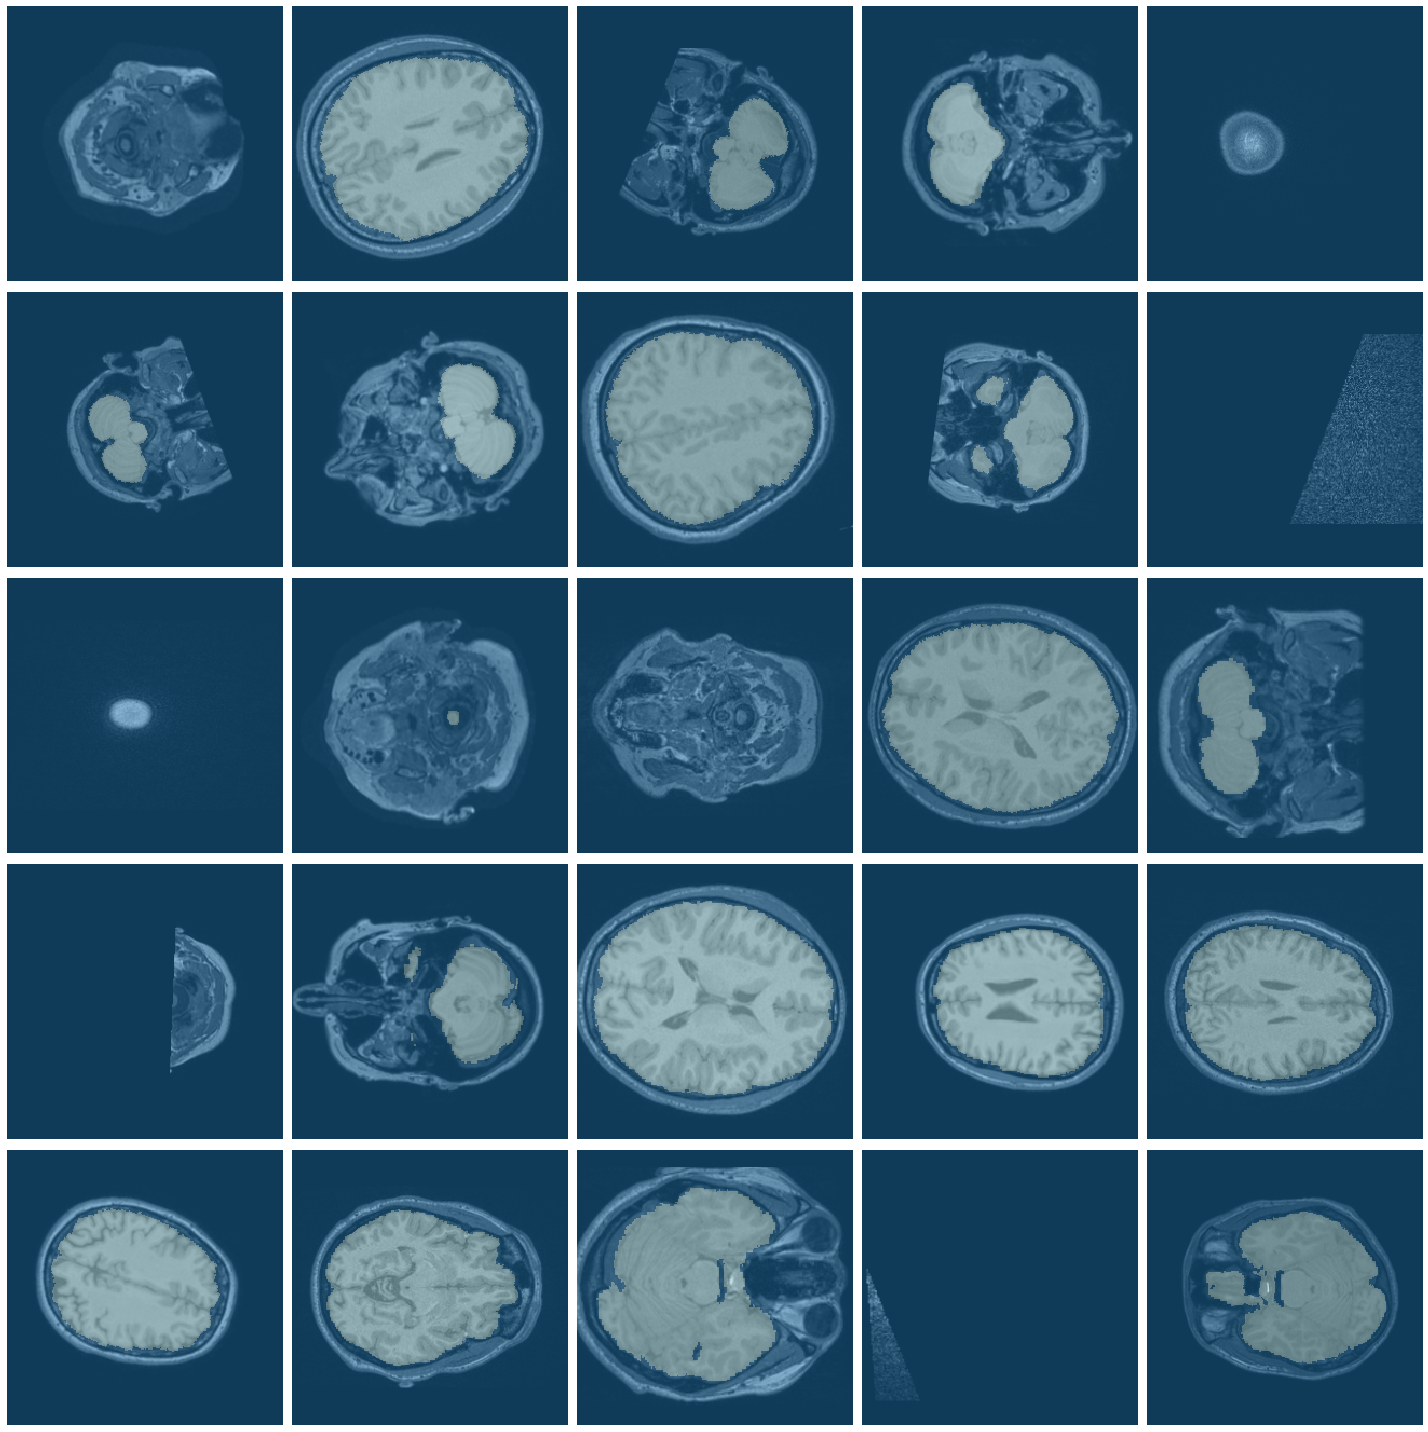

In [242]:
data.show_batch()

### Transforms based on [tutorial](https://docs.fast.ai/vision.transform.html)

In [155]:
def plots_f(rows, cols, width, height, **kwargs):
    [data.train_ds[100][0].apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]

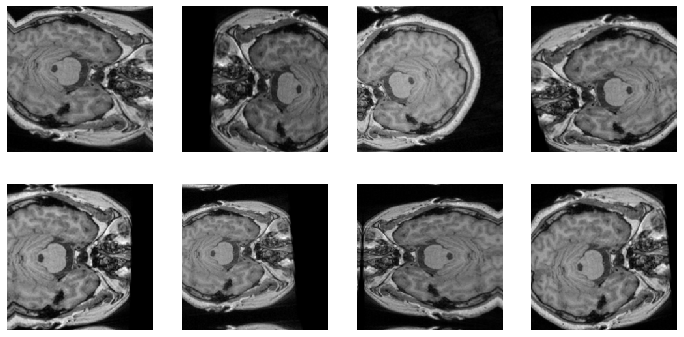

In [160]:
tfms = get_transforms(max_rotate=10)
plots_f(2, 4, 12, 6, size=224)

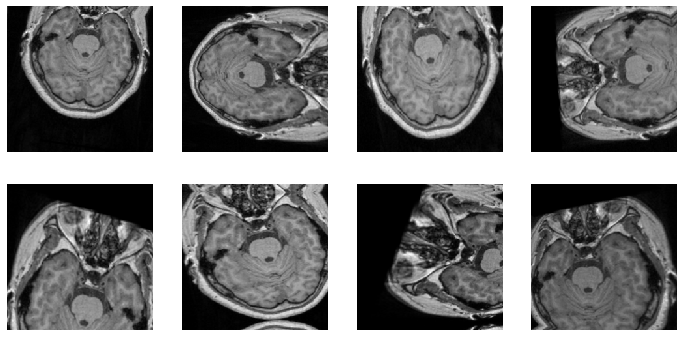

In [161]:
tfms = get_transforms(do_flip=True, flip_vert=True)
plots_f(2, 4, 12, 6, size=224)

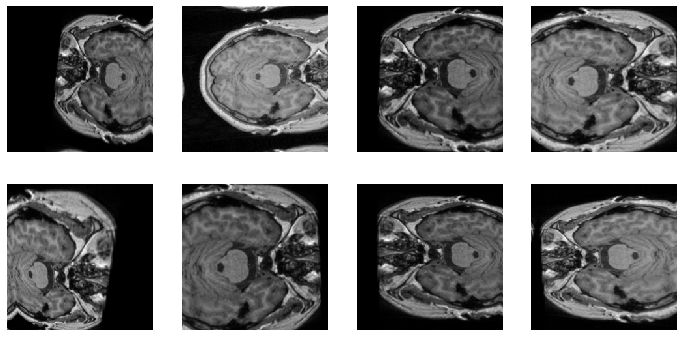

In [162]:
tfms = get_transforms(do_flip=True)
plots_f(2, 4, 12, 6, size=224)

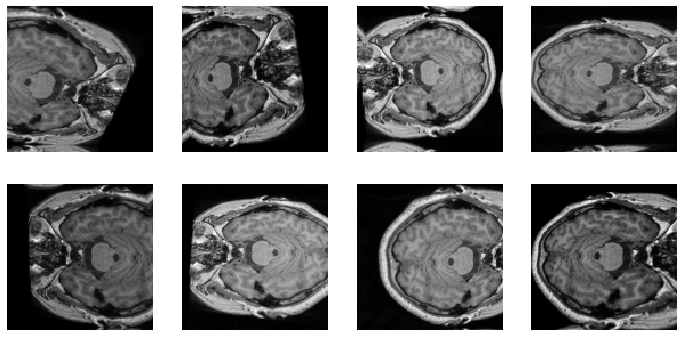

In [177]:
tfms = get_transforms(do_flip=True, flip_vert=False,
                      max_rotate=10)
plots_f(2, 4, 12, 6, size=128)

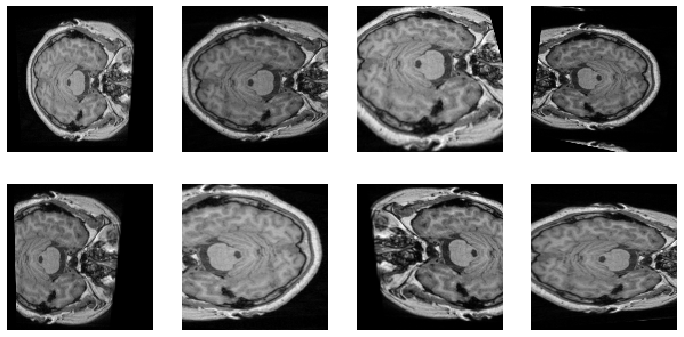

In [175]:
tfms = get_transforms(do_flip=True, flip_vert=False,
                      max_rotate=10,
                      )
plots_f(2, 4, 12, 6, size=128, padding_mode='zeros')


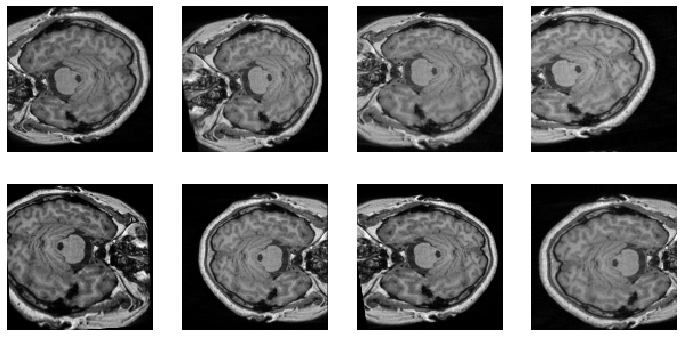

In [208]:
tfms = get_transforms(do_flip=True, flip_vert=False,
                      max_rotate=10, max_zoom=1.05,
                      max_lighting=0.2, max_warp=None,
                      p_affine=0.5, p_lighting=0.5
                      )
plots_f(2, 4, 12, 6, size=128, padding_mode='zeros', resize_method=ResizeMethod.PAD)